# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
p_data = pd.read_csv('E:\\T-SNE ASSIGNMENT\\train_data.csv')
r_data = pd.read_csv('E:\\T-SNE ASSIGNMENT\\resources.csv')

In [3]:
# i am going to take 50k points from the given data..,but before performing that, the data that is present in project data
# had some related data in resource data..,so first i merge this data tables by id..,and then i will take 50k points.

In [4]:
price_data = r_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
p_data = pd.merge(p_data, price_data, on='id', how='left')
p_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,67.98,4


In [5]:
project_data = p_data.iloc[0:50000,:]
print(project_data.shape)
project_data.head(5)

(50000, 19)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,67.98,4


In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
#print("Number of data points in train data", resource_data.shape)

Number of data points in train data (50000, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [7]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,481.04,9
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,17.74,14


## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,481.04,9,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,17.74,14,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle..."


In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.\r\n\r\n\"Self-motivated learners\" is a synonym of \"my students\".  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me, \"Ms. Perez, what are we going to learn today?\" I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lesson

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.     Self-motivated learners  is a synonym of  my students .  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me,  Ms. Perez, what are we going to learn today?  I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and disc

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach at a Title 1 school with 73 of my students who receive free reduced lunch Our school provides free breakfast for all students I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52 students with special needs The disabilities include Autism Spectrum Disorder Speech Impaired Language Impaired Other Health Impaired ADHD and Developmentally Delayed I also have about 42 of my students who are English Language Learners Self motivated learners is a synonym of my students They love to learn and they possess a positive outlook and attitude in school Almost everyday my students would ask me Ms Perez what are we going to learn today I could not ask for a better greeting from my students This project will greatly impact my students learning on a daily basis The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and discussions Despite the fact that stud

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:37<00:00, 1328.01it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]
print(len(preprocessed_essays))
project_data['preprocessed_essays']=preprocessed_essays

50000


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

In [20]:
#taking some random project titles

#print(project_data['project_title'].values[150])
#print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
#print(project_data['project_title'].values[99999])
#print("="*50)

Comfy Carpet for Creative Learning
Wiggle, Waggle, Wobble: Hocus Focus!


In [21]:
#for decontraction iam using same code
#we need to remove special character ":" and "!"
# Combining all the above statemennts 
from tqdm import tqdm
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n/10%10!=1)*(n%10<4)*n%10::4])
ordinal_words = [ordinal(n) for n in range(1,100)]
preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('\ :', ' ')
    sent = sent.replace('\ !' ,' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    #https://stackoverflow.com/questions/9647202/ordinal-numbers-replacement(removing ordinal text ex:1st,2nd,3rd,4th etc)
    sent = ' '.join(e for e in sent.split() if e not in ordinal_words)
    
    #how join will work ex:list1=['1','2','3','4'].,s='-';s=s.join(list1);s=>1-2-3-4

    preprocessed_project_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 19792.90it/s]


In [22]:
print(len(preprocessed_project_titles))
project_data['preprocessed_project_titles']=preprocessed_project_titles

50000


## 1.5 Preparing data for models

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_project_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [24]:
#before we are going to vectorozing the data we need to spplit it into train,test,cross validation
#since we will train with train data and we will test with test data and cross validation data.

y = project_data['project_is_approved'].values
X = project_data.drop('project_is_approved', 1)

In [25]:
#splitting data into train,test,cv:
#=====================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(22445, 21)
(16500, 21)
(11055, 21)


In [26]:
X_train['classlabel']=y_train.tolist()
print(X_train.shape)

(22445, 22)


In [27]:
#balancing data by performing upsampling for minority class(class-0)

##https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

from sklearn.utils import resample

X_train_not_approved= X_train[X_train.classlabel==0]
X_train_approved    = X_train[X_train.classlabel==1]


X_train_for_upsampled   = resample(X_train_not_approved,
                          replace=True, # sample with replacement
                          n_samples=len(X_train_approved), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
X_train_new = pd.concat([X_train_approved, X_train_for_upsampled])
print(X_train_new.shape)
X_train_new.classlabel.value_counts()


(37964, 22)


1    18982
0    18982
Name: classlabel, dtype: int64

In [28]:
y_train_new=X_train_new.classlabel.values
X_train_new=X_train_new.drop('classlabel',1)
print(X_train_new.shape)
print(y_train_new.shape)

(37964, 21)
(37964,)


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [29]:
# we use count vectorizer to convert the values into one 
#load count_vectorizer on train_data..,and then transform individual test and cv data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train_new['clean_categories'].values)
X_train_categories_one_hot = vectorizer.transform(X_train_new['clean_categories'].values)
X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
X_cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_test_categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_cv_categories_one_hot.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix after one hot encodig  (37964, 9)
Shape of matrix after one hot encodig  (16500, 9)
Shape of matrix after one hot encodig  (11055, 9)


In [30]:
# we use count vectorizer to convert the values into one 

vectorizer = CountVectorizer()
vectorizer.fit(X_train_new['clean_subcategories'].values)
X_train_sub_categories_one_hot = vectorizer.transform(X_train_new['clean_subcategories'].values)
X_test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
X_cv_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_sub_categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_test_sub_categories_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_cv_sub_categories_one_hot.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix after one hot encodig  (37964, 30)
Shape of matrix after one hot encodig  (16500, 30)
Shape of matrix after one hot encodig  (11055, 30)


In [173]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [31]:
# vectorizing state:

vectorizer = CountVectorizer()
vectorizer.fit(X_train_new['school_state'].unique())
X_train_school_state_one_hot = vectorizer.transform(X_train_new['school_state'].values)
X_test_school_state_one_hot = vectorizer.transform(X_test['school_state'].values)
X_cv_school_state_one_hot = vectorizer.transform(X_cv['school_state'].values)
print("Shape of matrix after one hot encodig ",X_train_school_state_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_test_school_state_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_cv_school_state_one_hot.shape)

Shape of matrix after one hot encodig  (37964, 51)
Shape of matrix after one hot encodig  (16500, 51)
Shape of matrix after one hot encodig  (11055, 51)


In [32]:
#for teacher_prefix:

#https://stackoverflow.com/questions/33257344/how-to-remove-special-characers-from-a-column-of-dataframe-using-module-re
X_train_new['teacher_prefix_cleaned'] = X_train_new['teacher_prefix'].str.replace('.','')
X_test['teacher_prefix_cleaned'] = X_test['teacher_prefix'].str.replace('.','')
X_cv['teacher_prefix_cleaned'] = X_cv['teacher_prefix'].str.replace('.','')

#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string/28390992

X_train_new['teacher_prefix_cleaned'] = X_train_new['teacher_prefix_cleaned'].fillna('none')
X_test['teacher_prefix_cleaned'] = X_test['teacher_prefix_cleaned'].fillna('none')
X_cv['teacher_prefix_cleaned'] = X_cv['teacher_prefix_cleaned'].fillna('none')

vectorizer = CountVectorizer()
vectorizer.fit(X_train_new['teacher_prefix_cleaned'].unique())
X_train_teacher_prefix_one_hot = vectorizer.transform(X_train_new['teacher_prefix_cleaned'].values)
X_test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix_cleaned'].values)
X_cv_teacher_prefix_one_hot = vectorizer.transform(X_cv['teacher_prefix_cleaned'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_teacher_prefix_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_test_teacher_prefix_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_cv_teacher_prefix_one_hot.shape)

['mr', 'mrs', 'ms', 'none', 'teacher']
Shape of matrix after one hot encodig  (37964, 5)
Shape of matrix after one hot encodig  (16500, 5)
Shape of matrix after one hot encodig  (11055, 5)


In [33]:
#for project_grade_category :

X_train_new['project_grade_category_cleaned']=X_train_new['project_grade_category'].str.replace(' ','_')
X_train_new['project_grade_category_cleaned']=X_train_new['project_grade_category_cleaned'].str.replace('-','_')
X_train_new['project_grade_category_cleaned']=X_train_new['project_grade_category_cleaned'].str.strip()


X_test['project_grade_category_cleaned']=X_test['project_grade_category'].str.replace(' ','_')
X_test['project_grade_category_cleaned']=X_test['project_grade_category_cleaned'].str.replace('-','_')
X_test['project_grade_category_cleaned']=X_test['project_grade_category_cleaned'].str.strip()


X_cv['project_grade_category_cleaned']=X_cv['project_grade_category'].str.replace(' ','_')
X_cv['project_grade_category_cleaned']=X_cv['project_grade_category_cleaned'].str.replace('-','_')
X_cv['project_grade_category_cleaned']=X_cv['project_grade_category_cleaned'].str.strip()

vectorizer = CountVectorizer()
vectorizer.fit(X_train_new['project_grade_category_cleaned'].values)
X_train_project_grade_category_one_hot = vectorizer.transform(X_train_new['project_grade_category_cleaned'].values)
X_test_project_grade_category_one_hot = vectorizer.transform(X_test['project_grade_category_cleaned'].values)
X_cv_project_grade_category_one_hot = vectorizer.transform(X_cv['project_grade_category_cleaned'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_project_grade_category_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_test_project_grade_category_one_hot.shape)
print("Shape of matrix after one hot encodig ",X_cv_project_grade_category_one_hot.shape)


['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of matrix after one hot encodig  (37964, 4)
Shape of matrix after one hot encodig  (16500, 4)
Shape of matrix after one hot encodig  (11055, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [34]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train_new.preprocessed_essays.values)
X_train_preprocessed_essays_bow=vectorizer.transform(X_train_new.preprocessed_essays.values)
X_test_preprocessed_essays_bow=vectorizer.transform(X_test.preprocessed_essays.values)
X_cv_preprocessed_essays_bow=vectorizer.transform(X_cv.preprocessed_essays.values)

print("Shape of matrix after one hot encodig ",X_train_preprocessed_essays_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_preprocessed_essays_bow.shape)
print("Shape of matrix after one hot encodig ",X_cv_preprocessed_essays_bow.shape)

Shape of matrix after one hot encodig  (37964, 11136)
Shape of matrix after one hot encodig  (16500, 11136)
Shape of matrix after one hot encodig  (11055, 11136)


In [35]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train_new.preprocessed_project_titles.values)
X_train_preprocessed_project_titles_bow=vectorizer.transform(X_train_new.preprocessed_project_titles.values)
X_test_preprocessed_project_titles_bow=vectorizer.transform(X_test.preprocessed_project_titles.values)
X_cv_preprocessed_project_titles_bow=vectorizer.transform(X_cv.preprocessed_project_titles.values)

print("Shape of matrix after one hot encodig ",X_train_preprocessed_project_titles_bow.shape)
print("Shape of matrix after one hot encodig ",X_test_preprocessed_project_titles_bow.shape)
print("Shape of matrix after one hot encodig ",X_cv_preprocessed_project_titles_bow.shape)

Shape of matrix after one hot encodig  (37964, 1886)
Shape of matrix after one hot encodig  (16500, 1886)
Shape of matrix after one hot encodig  (11055, 1886)


#### 1.5.2.2 TFIDF vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train_new.preprocessed_essays.values)
X_train_preprocessed_essays_tfidf=vectorizer.transform(X_train_new.preprocessed_essays.values)
X_test_preprocessed_essays_tfidf=vectorizer.transform(X_test.preprocessed_essays.values)
X_cv_preprocessed_essays_tfidf=vectorizer.transform(X_cv.preprocessed_essays.values)

print("Shape of matrix after one hot encodig ",X_train_preprocessed_essays_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_preprocessed_essays_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_cv_preprocessed_essays_tfidf.shape)

Shape of matrix after one hot encodig  (37964, 11136)
Shape of matrix after one hot encodig  (16500, 11136)
Shape of matrix after one hot encodig  (11055, 11136)


In [37]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train_new.preprocessed_project_titles.values)
X_train_preprocessed_project_titles_tfidf=vectorizer.transform(X_train_new.preprocessed_project_titles.values)
X_test_preprocessed_project_titles_tfidf=vectorizer.transform(X_test.preprocessed_project_titles.values)
X_cv_preprocessed_project_titles_tfidf=vectorizer.transform(X_cv.preprocessed_project_titles.values)

print("Shape of matrix after one hot encodig ",X_train_preprocessed_project_titles_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_preprocessed_project_titles_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_cv_preprocessed_project_titles_tfidf.shape)

Shape of matrix after one hot encodig  (37964, 1886)
Shape of matrix after one hot encodig  (16500, 1886)
Shape of matrix after one hot encodig  (11055, 1886)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [38]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('E:\\T-SNE ASSIGNMENT\\glove.42B.300d.txt')

Loading Glove Model


1917495it [06:12, 5149.89it/s]


Done. 1917495  words loaded!


In [43]:
words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_project_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))

all the words in the coupus 7114785
the unique words in the coupus 42985
The number of words that are present in both glove vectors and our coupus 39164 ( 91.111 %)
word 2 vec length 39164


In [44]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('E:\\T-SNE ASSIGNMENT\\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [45]:
# average Word2Vec on essay
# compute average word2vec for each review.
X_train_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_new.preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_essays.append(vector)

print(len(X_train_avg_w2v_vectors_essays))
print(len(X_train_avg_w2v_vectors_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████| 37964/37964 [00:16<00:00, 2369.42it/s]


37964
300


In [46]:
#average w2vec for X_test data essays
X_test_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test.preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_essays.append(vector)

print(len(X_test_avg_w2v_vectors_essays))
print(len(X_test_avg_w2v_vectors_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:07<00:00, 2255.18it/s]


16500
300


In [47]:
#average w2vec for X_cv data essays
X_cv_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv.preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors_essays.append(vector)

print(len(X_cv_avg_w2v_vectors_essays))
print(len(X_cv_avg_w2v_vectors_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:04<00:00, 2333.82it/s]


11055
300


In [48]:
# average Word2Vec X_train on titles
X_train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_new.preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_titles.append(vector)

print(len(X_train_avg_w2v_vectors_titles))
print(len(X_train_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 37964/37964 [00:00<00:00, 41057.36it/s]


37964
300


In [49]:
#average w2vec for X_test data titles
X_test_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test.preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_titles.append(vector)

print(len(X_test_avg_w2v_vectors_titles))
print(len(X_test_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 36702.15it/s]


16500
300


In [50]:
#average w2vec for X_cv data titles
X_cv_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv.preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors_titles.append(vector)

print(len(X_cv_avg_w2v_vectors_titles))
print(len(X_cv_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 34711.62it/s]


11055
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [51]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_new.preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [52]:
# average Word2Vec
# compute average word2vec for each review.
X_train_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_new.preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_train_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_train_preprocessed_essays_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 37964/37964 [01:37<00:00, 389.28it/s]


37964
300


In [53]:
# compute average word2vec for each review in test data
X_test_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test.preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_test_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_test_preprocessed_essays_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:45<00:00, 366.23it/s]


16500
300


In [54]:
# compute average word2vec for each review in cv data
X_cv_preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv.preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_essays_tfidf_w2v_vectors))
print(len(X_cv_preprocessed_essays_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:32<00:00, 344.31it/s]


11055
300


### tf-idf w2vec vectorize for title also

In [55]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_new.preprocessed_project_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec for train data titles
X_train_preprocessed_project_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_new.preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_preprocessed_project_titles_tfidf_w2v_vectors.append(vector)

print(len(X_train_preprocessed_project_titles_tfidf_w2v_vectors))
print(len(X_train_preprocessed_project_titles_tfidf_w2v_vectors[0]))

#-----------------------------------
# average Word2Vec for test data titles

X_test_preprocessed_project_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test.preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_preprocessed_project_titles_tfidf_w2v_vectors.append(vector)

print(len(X_test_preprocessed_project_titles_tfidf_w2v_vectors))
print(len(X_test_preprocessed_project_titles_tfidf_w2v_vectors[0]))

#-----------------------------------
# average Word2Vec for cv data titles

X_cv_preprocessed_project_titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv.preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_preprocessed_project_titles_tfidf_w2v_vectors.append(vector)

print(len(X_cv_preprocessed_project_titles_tfidf_w2v_vectors))
print(len(X_cv_preprocessed_project_titles_tfidf_w2v_vectors[0]))


100%|█████████████████████████████████████████████████████████████████████████| 37964/37964 [00:01<00:00, 23027.69it/s]


37964
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 22791.55it/s]


16500
300


100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 23024.43it/s]


11055
300


### 1.5.3 Vectorizing Numerical features

In [56]:
#1.5.3 Vectorizing Numerical features

#price normlaization:
#===================

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train_new['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train_new['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train_new.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(37964, 1) (37964,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [57]:
#quantity standardization:
#==============================

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train_new['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train_new['quantity'].values.reshape(-1,1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train_new.shape)
print(X_cv_quantity_norm.shape, y_train_new.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(37964, 1) (37964,)
(11055, 1) (37964,)
(16500, 1) (16500,)


In [58]:
#teacher_number_of_previously_posted_projects standardization:

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train_new['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previously_posted_projects_norm = normalizer.transform(X_train_new['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_previously_posted_projects_norm.shape, y_train_new.shape)
print(X_cv_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(37964, 1) (37964,)
(11055, 1) (11055,)
(16500, 1) (16500,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [59]:
from scipy import sparse
X_train_teacher_number_of_previously_posted_projects=X_train_new["teacher_number_of_previously_posted_projects"].values.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects=X_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1)
X_cv_teacher_number_of_previously_posted_projects=X_cv["teacher_number_of_previously_posted_projects"].values.reshape(-1,1)
print(X_train_teacher_number_of_previously_posted_projects.shape)
print(X_test_teacher_number_of_previously_posted_projects.shape)
print(X_cv_teacher_number_of_previously_posted_projects.shape)

print(X_train_categories_one_hot.shape)
print(X_test_categories_one_hot.shape)
print(X_cv_categories_one_hot.shape)

print(X_train_sub_categories_one_hot.shape)
print(X_test_sub_categories_one_hot.shape)
print(X_cv_sub_categories_one_hot.shape)

print(X_train_preprocessed_essays_bow.shape)
print(X_test_preprocessed_essays_bow.shape)
print(X_cv_preprocessed_essays_bow.shape)

print(X_train_preprocessed_essays_tfidf.shape)
print(X_test_preprocessed_essays_tfidf.shape)
print(X_cv_preprocessed_essays_tfidf.shape)

X_train_avg_w2v_vectors_essays=sparse.csr_matrix(X_train_avg_w2v_vectors_essays)
X_test_avg_w2v_vectors_essays=sparse.csr_matrix(X_test_avg_w2v_vectors_essays)
X_cv_avg_w2v_vectors_essays=sparse.csr_matrix(X_cv_avg_w2v_vectors_essays)
print(X_train_avg_w2v_vectors_essays.shape)
print(X_test_avg_w2v_vectors_essays.shape)
print(X_cv_avg_w2v_vectors_essays.shape)

X_train_preprocessed_essays_tfidf_w2v_vectors=sparse.csr_matrix(X_train_preprocessed_essays_tfidf_w2v_vectors)
X_test_preprocessed_essays_tfidf_w2v_vectors=sparse.csr_matrix(X_test_preprocessed_essays_tfidf_w2v_vectors)
X_cv_preprocessed_essays_tfidf_w2v_vectors=sparse.csr_matrix(X_cv_preprocessed_essays_tfidf_w2v_vectors)
print(X_train_preprocessed_essays_tfidf_w2v_vectors.shape)
print(X_test_preprocessed_essays_tfidf_w2v_vectors.shape)
print(X_cv_preprocessed_essays_tfidf_w2v_vectors.shape)





(37964, 1)
(16500, 1)
(11055, 1)
(37964, 9)
(16500, 9)
(11055, 9)
(37964, 30)
(16500, 30)
(11055, 30)
(37964, 11136)
(16500, 11136)
(11055, 11136)
(37964, 11136)
(16500, 11136)
(11055, 11136)
(37964, 300)
(16500, 300)
(11055, 300)
(37964, 300)
(16500, 300)
(11055, 300)


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [60]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
#preparing set-1
#=======================================
from scipy.sparse import hstack
X_train_model= hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_school_state_one_hot,X_train_teacher_prefix_one_hot,
              X_train_project_grade_category_one_hot,X_train_price_norm,X_train_quantity_norm,X_train_previously_posted_projects_norm,X_train_preprocessed_project_titles_bow,
              X_train_preprocessed_essays_bow)).tocsr()
X_test_model = hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_school_state_one_hot,X_test_teacher_prefix_one_hot,
              X_test_project_grade_category_one_hot,X_test_price_norm,X_test_quantity_norm,X_test_previously_posted_projects_norm,X_test_preprocessed_project_titles_bow,
              X_test_preprocessed_essays_bow)).tocsr()
X_cv_model = hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_school_state_one_hot,X_cv_teacher_prefix_one_hot,
              X_cv_project_grade_category_one_hot,X_cv_price_norm,X_cv_quantity_norm,X_cv_previously_posted_projects_norm,X_cv_preprocessed_project_titles_bow,
              X_cv_preprocessed_essays_bow)).tocsr()



print(X_train_model.shape)
print(X_test_model.shape)
print(X_cv_model.shape)
print(y_train_new.shape)
print(y_test.shape)
print(y_cv.shape)



(37964, 13124)
(16500, 13124)
(11055, 13124)
(37964,)
(16500,)
(11055,)


In [61]:
#data perfectly balanced

print(y_train_new.shape)
runs=y_train_new.shape[0]
zeros=0
ones=0
for i in range(runs):
    if(y_train_new[i]==0):
        zeros=zeros+1
    else:
        ones=ones+1
print(zeros)
print(ones)


(37964,)
18982
18982


In [62]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [41:33<00:00, 325.30s/it]


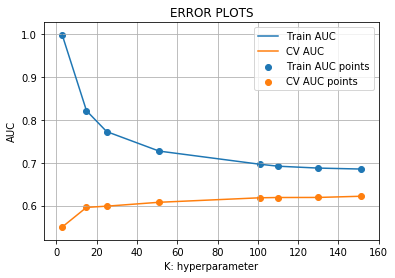

In [63]:
# so by observing above graph at k-value 21 i am getting maximum accuracy ,beyond it's looking like similar.,
# so to avoid overfitting i am choosing the value for k=21
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101,110,130,151]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_model, y_train_new)

    y_train_pred = batch_predict(neigh, X_train_model)    
    y_cv_pred = batch_predict(neigh, X_cv_model)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train_new,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [65]:
# so by observing above graph at k-value 150 i am getting maximum accuracy ,beyond it's looking like similar.,
best_k=111

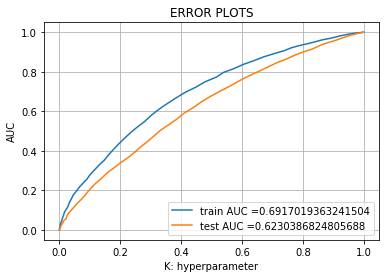

In [66]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_train_model, y_train_new)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_model)    
y_test_pred = batch_predict(neigh, X_test_model)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [67]:
##confusion matrix:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [68]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_new, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.41242538320301025 for threshold 0.432
Train confusion matrix
[[12259  6723]
 [ 6860 12122]]
Test confusion matrix
[[1424 1122]
 [5311 8643]]


In [ ]:
#results
precision on test data set is=1424/(1421+5311)=0.21....very low presicion ..,out of all points predicted by model as class 1 out
of which only 21% are actually positive.

recall on test data set is=1424/(1424+1122)=0.55.... ..,out of all points that are actually belongs to class-1 .,my model predict
them as class 1 with 53%


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [69]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
#preparing set-2

from scipy.sparse import hstack
X_train_model= hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_school_state_one_hot,X_train_teacher_prefix_one_hot,
              X_train_project_grade_category_one_hot,X_train_price_norm,X_train_quantity_norm,X_train_previously_posted_projects_norm,X_train_preprocessed_project_titles_tfidf,
              X_train_preprocessed_essays_tfidf)).tocsr()
X_test_model = hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_school_state_one_hot,X_test_teacher_prefix_one_hot,
              X_test_project_grade_category_one_hot,X_test_price_norm,X_test_quantity_norm,X_test_previously_posted_projects_norm,X_test_preprocessed_project_titles_tfidf,
              X_test_preprocessed_essays_tfidf)).tocsr()
X_cv_model = hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_school_state_one_hot,X_cv_teacher_prefix_one_hot,
              X_cv_project_grade_category_one_hot,X_cv_price_norm,X_cv_quantity_norm,X_cv_previously_posted_projects_norm,X_cv_preprocessed_project_titles_tfidf,
              X_cv_preprocessed_essays_tfidf)).tocsr()



print(X_train_model.shape)
print(X_test_model.shape)
print(X_cv_model.shape)
print(y_train_new.shape)
print(y_test.shape)
print(y_cv.shape)


(37964, 13124)
(16500, 13124)
(11055, 13124)
(37964,)
(16500,)
(11055,)


### Feature selection with `SelectKBest` 

In [70]:
#https://stackoverflow.com/questions/46927545/get-feature-names-of-selectkbest-function-python

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k = 2000 )
selector.fit(X_train_model,y_train_new)

X_train_2000_features = selector.transform(X_train_model)
X_test_2000_features = selector.transform(X_test_model)
X_cv_2000_features = selector.transform(X_cv_model)

print(X_train_2000_features.shape)
print(X_test_2000_features.shape)
print(X_cv_2000_features.shape)


(37964, 2000)
(16500, 2000)
(11055, 2000)


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [27:16<00:00, 202.85s/it]


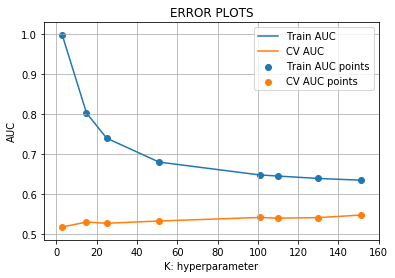

In [71]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101,110,130,151]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_2000_features, y_train_new)

    y_train_pred = batch_predict(neigh, X_train_2000_features)    
    y_cv_pred = batch_predict(neigh, X_cv_2000_features)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train_new,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [72]:
# so by observing above graph at k-value 110 i am getting maximum accuracy on cv data ,beyond it's getting down again.,
best_k=101

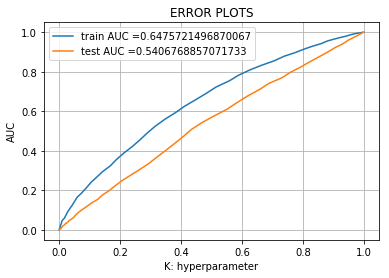

In [73]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_train_2000_features, y_train_new)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_2000_features)    
y_test_pred = batch_predict(neigh, X_test_2000_features)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [74]:
##confusion matrix:
#================

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train_new, predict_with_best_t(y_train_pred, best_t)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.36813848045363606 for threshold 0.475
Train confusion matrix
[[11158  7824]
 [ 7094 11888]]
Test confusion matrix
[[1141 1405]
 [5424 8530]]


In [ ]:
precision=1141/(1141+5424)=0.17 (very low )
recall=1141/(1141+1405)=0.448(if point is actuall is postive then the model prect as positive 50% of chance)

In [75]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [76]:
X_train_model_set1= hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_school_state_one_hot,X_train_teacher_prefix_one_hot,
              X_train_project_grade_category_one_hot,X_train_price_norm,X_train_quantity_norm,X_train_previously_posted_projects_norm,X_train_preprocessed_project_titles_bow,
              X_train_preprocessed_essays_bow)).tocsr()
X_test_model_set1 = hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_school_state_one_hot,X_test_teacher_prefix_one_hot,
              X_test_project_grade_category_one_hot,X_test_price_norm,X_test_quantity_norm,X_test_previously_posted_projects_norm,X_test_preprocessed_project_titles_bow,
              X_test_preprocessed_essays_bow)).tocsr()
X_cv_model_set1 = hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_school_state_one_hot,X_cv_teacher_prefix_one_hot,
              X_cv_project_grade_category_one_hot,X_cv_price_norm,X_cv_quantity_norm,X_cv_previously_posted_projects_norm,X_cv_preprocessed_project_titles_bow,
              X_cv_preprocessed_essays_bow)).tocsr()



print(X_train_model_set1.shape)
print(X_test_model_set1.shape)
print(X_cv_model_set1.shape)
print(y_train_new.shape)
print(y_test.shape)
print(y_cv.shape)


(37964, 13124)
(16500, 13124)
(11055, 13124)
(37964,)
(16500,)
(11055,)


In [77]:
# Please write all the code with proper documentation

#brute force knn with k=150 on set-1(bow)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

predictions=[]
threshould=0.5
k=111
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train_model_set1, y_train_new)
y_train_pred = batch_predict(neigh, X_train_model_set1)    
y_test_pred = batch_predict(neigh, X_test_model_set1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
predictions = predict_with_best_t(y_test_pred, best_t)

print(metrics.accuracy_score(y_test, predictions))

the maximum value of tpr*(1-fpr) 0.41242538320301025 for threshold 0.432
0.6101212121212122


### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [78]:
from scipy.sparse import hstack
X_train_model_set2= hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_school_state_one_hot,X_train_teacher_prefix_one_hot,
              X_train_project_grade_category_one_hot,X_train_price_norm,X_train_quantity_norm,X_train_previously_posted_projects_norm,X_train_preprocessed_project_titles_tfidf,
              X_train_preprocessed_essays_tfidf)).tocsr()
X_test_model_set2 = hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_school_state_one_hot,X_test_teacher_prefix_one_hot,
              X_test_project_grade_category_one_hot,X_test_price_norm,X_test_quantity_norm,X_test_previously_posted_projects_norm,X_test_preprocessed_project_titles_tfidf,
              X_test_preprocessed_essays_tfidf)).tocsr()
X_cv_model_set2 = hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_school_state_one_hot,X_cv_teacher_prefix_one_hot,
              X_cv_project_grade_category_one_hot,X_cv_price_norm,X_cv_quantity_norm,X_cv_previously_posted_projects_norm,X_cv_preprocessed_project_titles_tfidf,
              X_cv_preprocessed_essays_tfidf)).tocsr()



print(X_train_model.shape)
print(X_test_model.shape)
print(X_cv_model.shape)
print(y_train_new.shape)
print(y_test.shape)
print(y_cv.shape)


(37964, 13124)
(16500, 13124)
(11055, 13124)
(37964,)
(16500,)
(11055,)


In [79]:
# Please write all the code with proper documentation

#brute force knn with k=150 on set-2(tfidf)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

predictions=[]
threshould=0.5
k=101
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train_model_set2, y_train_new)
y_train_pred = batch_predict(neigh, X_train_model_set2)    
y_test_pred = batch_predict(neigh, X_test_model_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
predictions = predict_with_best_t(y_test_pred, best_t)

print(metrics.accuracy_score(y_test, predictions))

the maximum value of tpr*(1-fpr) 0.37278661568494464 for threshold 0.505
0.5673939393939393


### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [89]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
X_train_model_set3= hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_school_state_one_hot,X_train_teacher_prefix_one_hot,
              X_train_project_grade_category_one_hot,X_train_price_norm,X_train_quantity_norm,X_train_previously_posted_projects_norm,X_train_avg_w2v_vectors_titles,
              X_train_avg_w2v_vectors_essays)).tocsr()
X_test_model_set3 = hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_school_state_one_hot,X_test_teacher_prefix_one_hot,
              X_test_project_grade_category_one_hot,X_test_price_norm,X_test_quantity_norm,X_test_previously_posted_projects_norm,X_test_avg_w2v_vectors_titles,
              X_test_avg_w2v_vectors_essays)).tocsr()
X_cv_model_set3 = hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_school_state_one_hot,X_cv_teacher_prefix_one_hot,
              X_cv_project_grade_category_one_hot,X_cv_price_norm,X_cv_quantity_norm,X_cv_previously_posted_projects_norm,X_cv_avg_w2v_vectors_titles,
              X_cv_avg_w2v_vectors_essays)).tocsr()



print(X_train_model_set3.shape)
print(X_test_model_set3.shape)
print(X_cv_model_set3.shape)
print(y_train_new.shape)
print(y_test.shape)
print(y_cv.shape)



(37964, 702)
(16500, 702)
(11055, 702)
(37964,)
(16500,)
(11055,)


In [90]:
X_train_model_set3_15000 = X_train_model_set3[0:15000,:]
y_train_new_15000 = y_train_new[0:15000]
X_test_model_set3_6000=X_test_model_set3[0:6000,:]
y_test_6000=y_test[0:6000]
print(X_train_model_set3_15000.shape)
print(y_train_new_15000.shape)
print(X_test_model_set3_6000.shape)
print(y_test_6000.shape)

(15000, 702)
(15000,)
(6000, 702)
(6000,)


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [21:27<00:00, 160.31s/it]


Text(0,0.5,'ACCUracy')

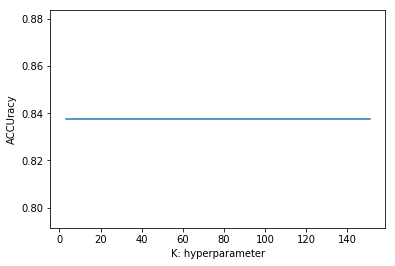

In [94]:
# Please write all the code with proper documentation

#brute force knn with k=150 on set-2(tfidf)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

predictions=[]
k = [3, 15, 25, 51, 101,110,130,151]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_model_set3_15000, y_train_new_15000)
    y_test_pred = neigh.predict(X_test_model_set3_6000)
    predictions.append(metrics.accuracy_score(y_test_6000, y_test_pred))

plt.plot(k,predictions)
plt.xlabel("K: hyperparameter")
plt.ylabel("ACCUracy")




In [96]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
from scipy.sparse import hstack
X_train_model_set4= hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_school_state_one_hot,X_train_teacher_prefix_one_hot,
              X_train_project_grade_category_one_hot,X_train_price_norm,X_train_quantity_norm,X_train_previously_posted_projects_norm,X_train_preprocessed_essays_tfidf_w2v_vectors,
              X_train_preprocessed_project_titles_tfidf_w2v_vectors)).tocsr()
X_test_model_set4 = hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_school_state_one_hot,X_test_teacher_prefix_one_hot,
              X_test_project_grade_category_one_hot,X_test_price_norm,X_test_quantity_norm,X_test_previously_posted_projects_norm,X_test_preprocessed_essays_tfidf_w2v_vectors,
              X_test_preprocessed_project_titles_tfidf_w2v_vectors)).tocsr()
X_cv_model_set4 = hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_school_state_one_hot,X_cv_teacher_prefix_one_hot,
              X_cv_project_grade_category_one_hot,X_cv_price_norm,X_cv_quantity_norm,X_cv_previously_posted_projects_norm,X_cv_preprocessed_essays_tfidf_w2v_vectors,
              X_cv_preprocessed_project_titles_tfidf_w2v_vectors)).tocsr()



print(X_train_model_set4.shape)
print(X_test_model_set4.shape)
print(X_cv_model_set4.shape)
print(y_train_new.shape)
print(y_test.shape)
print(y_cv.shape)



(37964, 702)
(16500, 702)
(11055, 702)
(37964,)
(16500,)
(11055,)


In [97]:
X_train_model_set4_15000 = X_train_model_set4[0:15000,:]
y_train_new_15000 = y_train_new[0:15000]
X_test_model_set4_6000=X_test_model_set4[0:6000,:]
y_test_6000=y_test[0:6000]
print(X_train_model_set4_15000.shape)
print(y_train_new_15000.shape)
print(X_test_model_set4_6000.shape)
print(y_test_6000.shape)

(15000, 702)
(15000,)
(6000, 702)
(6000,)


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [26:13<00:00, 196.78s/it]


Text(0,0.5,'ACCUracy')

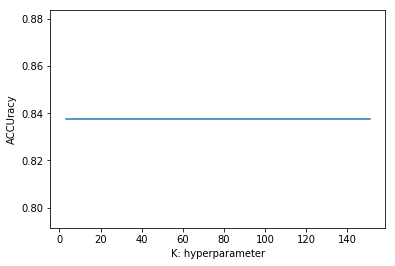

In [98]:
# Please write all the code with proper documentation

#brute force knn with k=150 on set-2(tfidf)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

predictions=[]
k = [3, 15, 25, 51, 101,110,130,151]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_model_set4_15000, y_train_new_15000)
    y_test_pred = neigh.predict(X_test_model_set4_6000)
    predictions.append(metrics.accuracy_score(y_test_6000, y_test_pred))

plt.plot(k,predictions)
plt.xlabel("K: hyperparameter")
plt.ylabel("ACCUracy")




In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>3. Conclusions</h1>

In [99]:
# Please compare all your models using Prettytable library
#i am providing my brute force model results
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Hyperparameter", "AUC"]
x.add_row(["Bag of Words", 150, 0.617])
x.add_row(["TF-IDF", 150, 0.58])
x.add_row(["AvG-w2-vec", 150, 0.83])
x.add_row(["TF-IDF-W2-VEC", 150,0.83])
print(x)

+---------------+----------------+-------+
|   Vectorizer  | Hyperparameter |  AUC  |
+---------------+----------------+-------+
|  Bag of Words |      150       | 0.617 |
|     TF-IDF    |      150       |  0.58 |
|   AvG-w2-vec  |      150       |  0.83 |
| TF-IDF-W2-VEC |      150       |  0.83 |
+---------------+----------------+-------+
